<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Neural_Network_with_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
## Predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

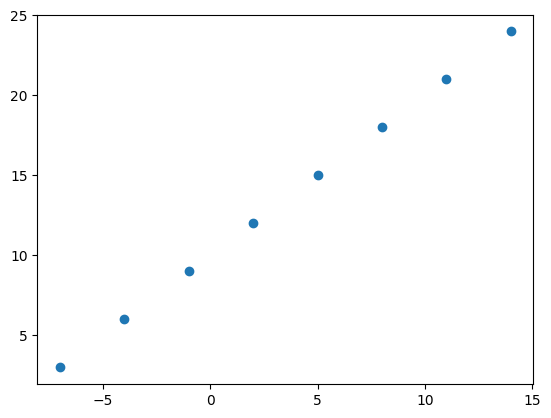

In [ ]:
#Create features
X = np.array([ -7.0 , -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

#Create dependent variables
y = np.array([ 3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0 , 24.0])

#Visualize it
plt.scatter(X,y);

In [ ]:
y == X + 10  #pattern ı kendimiz bulduk

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant([ "bedroom" , "bathroom" , "garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape  #kodu çalıştırdığımızda shape i yok gibi gözüküyor çünkü bracketklerin içi boş.  X ve y yi scalar olarak belirlediğimiz için fundamentalden hatırlarsak shape i de 0 oluyor çünkü dimensionu 0

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Turn out numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X , y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling with tensorflow
* 1)Creating a model : define the input and output layers, as well as hidden layers of a deep learning model
* 2)Compiling a model : define the loss function ( in other words , the function which tells us our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
* 3)Fittin a model : letting the model try to find patterns features and dependent variables.

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1)Creating a model

model = tf.keras.Sequential(
    [ tf.keras.layers.Dense(1) ]
    #[tf.keras.layers.Dense(100 , activation= "relu")]  100 dediğimiz kaç neuron istediğimiz. bir de activation function ekleyebiliyoruz.
)   #burda dense 1 dememizin sebebi 1 inputtan 1 output predict ediyoruz. burda input layerımızı eklemiş olduk. model.add ile de yapabiliriz tensorflow sitesinden bak


#2) Compile the model

model.compile(loss = tf.keras.losses.mae , #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD() ,  #sgd is short for sthocastic gradient descent
              metrics = ["mae"])  #evaluation metrics bu accuracy de seçilebilir.

#3)Fit the model
model.fit( tf.expand_dims(X , axis = -1 ), y , epochs = 5 )  #epochs yani 5 kere input ve outputları baştan öğrencek demek

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 17.5355 - mae: 17.5355
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 17.2542 - mae: 17.2542
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 16.9730 - mae: 16.9730
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 16.6917 - mae: 16.6917
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 16.4105 - mae: 16.4105


In [ ]:
#Try and make a prediction with our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 76ms/step


array([[-10.995797]], dtype=float32)

# Improving our model
* We can improve our model by altering the steps we took to create a model
* 1) In creating a model , we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers , change the activation function of each layer.
* 2) In compiling a model , we might change the optimizer function or perhaps the learning rate of the optimizer func.
* 3) In fitting a model , we might fit a model for more epochs (Leave it training for longer) or on more data(give the model examples to learn from)

* Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
#Rebuild our model with some differences for improving
#Create a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

#Compile a model
model_2.compile(loss = tf.keras.losses.mae , #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD() ,  #sgd is short for sthocastic gradient descent
              metrics = ["mae"])

#Fit the model (değişikliği burada yaptık sadece epoch sayısını 100 e çıkardık)
model_2.fit( tf.expand_dims(X , axis = -1 ), y , epochs = 100 )


Epoch 1/100
1/1 [==============================] - 0s 341ms/step - loss: 13.0866 - mae: 13.0866
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9541 - mae: 12.9541
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8216 - mae: 12.8216
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6891 - mae: 12.6891
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5566 - mae: 12.5566
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4241 - mae: 12.4241
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2916 - mae: 12.2916
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1591 - mae: 12.1591
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0266 - mae: 12.0266
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8941 - mae: 11.8941
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
#Try and make a prediction again with our improved model
model_2.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[29.645315]], dtype=float32)

In [ ]:
#Rebuild our model with some differences for improving and we will do one more changing. We will add extra hidden layer
#Create a model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(

  [ tf.keras.layers.Dense(100 , activation= "relu") ,
    tf.keras.layers.Dense(1) ]
)

#Compile a model
model_3.compile(loss = tf.keras.losses.mae , #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD() ,  #sgd is short for sthocastic gradient descent
              metrics = ["mae"])

#Fit the model (değişikliği burada yaptık sadece epoch sayısını 100 e çıkardık)
model_3.fit( tf.expand_dims(X , axis = -1 ), y , epochs = 100 )

Epoch 1/100
1/1 [==============================] - 1s 580ms/step - loss: 12.0933 - mae: 12.0933
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5232 - mae: 11.5232
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9515 - mae: 10.9515
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3588 - mae: 10.3588
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7421 - mae: 9.7421
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0974 - mae: 9.0974
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4606 - mae: 8.4606
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8113 - mae: 7.8113
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1181 - mae: 7.1181
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.3708 - mae: 6.3708
Epoch 11/100
1/1 [==============================] - 0s 9ms/ste

In [ ]:
#Try and make a prediction again with our improved model
model_3.predict([17.0])  #Bu predictimiz aslında modelin mae si çok daha düşük olmasına rağmen bir önceki modele göre predict value da daha kötü bir sonuç verdi yani aslında overfitting oldu modelimiz.
#Yani aslında bizim modelimiz training datayı çok iyi öğrendiği için bu da yeni hiç görmediği datapointlerle karşılaştığında sorun yaratıyor.

1/1 [==============================] - 0s 59ms/step


array([[31.809484]], dtype=float32)

In [ ]:
#Rebuild our model with some differences for improving and we will do one more changing. We will delete our hidden layers and reduce the neuron number and change the activation function
#Also we will change the optimizer function with adam and we will use the learning rate with adam. LEARNING RATE İS THE MOST IMPORTANT HYPERPARAMETER YOU CAN CHANGE ON ALL OF YOUR NEURAL NETWORK
#Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(

  [ tf.keras.layers.Dense(50 , activation= None) ,
    tf.keras.layers.Dense(1) ]
)

#Compile a model
model_4.compile(loss = tf.keras.losses.mae , #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) ,  #lr is the learning rate and it has the default value 0.001. If we increase this value, our model will learn better
              metrics = ["mae"])

#Fit the model (değişikliği burada yaptık sadece epoch sayısını 100 e çıkardık)
model_4.fit( tf.expand_dims(X , axis = -1 ), y , epochs = 100 )

Epoch 1/100
1/1 [==============================] - 1s 948ms/step - loss: 14.2724 - mae: 14.2724
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5718 - mae: 13.5718
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8790 - mae: 12.8790
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1928 - mae: 12.1928
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5113 - mae: 11.5113
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8329 - mae: 10.8329
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1554 - mae: 10.1554
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4764 - mae: 9.4764
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7935 - mae: 8.7935
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1040 - mae: 8.1040
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
model_4.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[26.487148]], dtype=float32)

# Evaluating a model
* Build a model => fit it => evaluate it => tweak a model(yani epochs falan değiştirme improve etme) => fit it => evaluate it ....

When it comes the evaluation ... there are 3 word you should memorize:
> Visualize , Visualize , Visualize
It's good idea to visualize:
* The data : What data are we working with? What does it look like?
* The model itself : What does our model look like?
* The training of a model : How does a model perform while it learns?
* The predictions of the model : How do the predictions of a model line up againts the ground truth (The original dependent variables)?

In [ ]:
#Make a bigger dataset
X = tf.range(-100  , 100 , 4 )
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make dependent variables for our dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

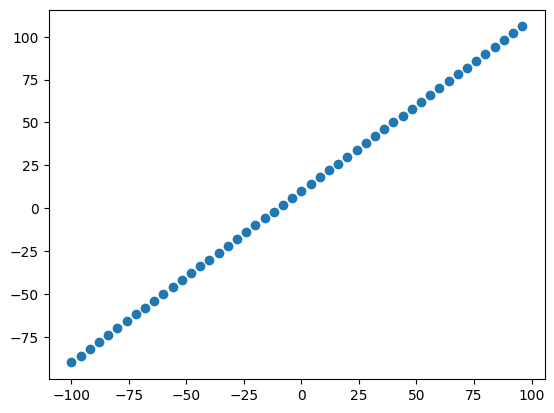

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X , y)

# The 3 sets...
* Training set : the model learns from this data , which is typically 70-80% of the total data you have available
* Validation set : the model gets tuned on this data. Aslında tweak ettiğimiz şeyleri deniyoruz burda yani improve ettiğimizde az önce gördük overfitting de olabiliyoruz burda bunları deniyoruz. Typically 10-15% of the data available
* Test set : The model gets evaluated on this data to test what it has learned , this set is typically 10-15% of the total data available

In [ ]:
len(X)

50

In [ ]:
#Split the data into training set and test set
X_train = X[ : 40 ]  #first 40 are training samples (%80 of the data) our model will learn on this
y_train = y[ : 40 ]

X_test = X[ 40 : ] #last 10 are testing samples (%20 of the data) want our model to be able to predict this (given x , what is y?)
y_test = y[ 40 : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

# Visualizing the data
Now we have got our data in tranining set and test sets... lets visualize it again

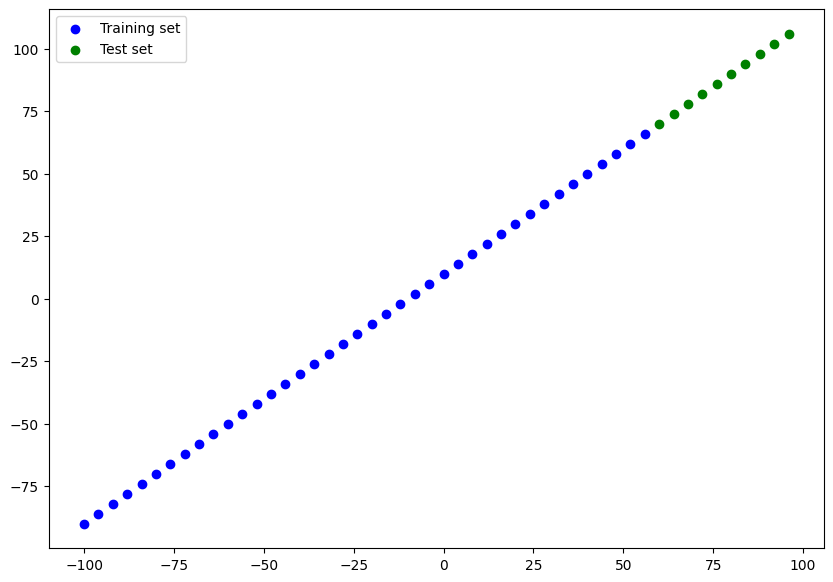

In [ ]:
plt.figure(figsize = (10,7))
#Plot training data with blue
plt.scatter(X_train , y_train , c = 'b' , label = "Training set")
#Plot test set with green
plt.scatter(X_test , y_test , c = 'g' , label = "Test set")
plt.legend();


In [ ]:
#Lets have a look at how to build a neural network for our data

#1) Create a model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1) ]
)

# 2)Compile a model
model.compile(loss = tf.keras.losses.mae , #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) ,  #lr is the learning rate and it has the default value 0.001. If we increase this value, our model will learn better
              metrics = ["mae"])

# 3) Fit the model
model.fit( tf.expand_dims(X_train , axis = -1 ), y_train , epochs = 100 )



Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 61.9254 - mae: 61.9254
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 61.0482 - mae: 61.0482
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 60.2013 - mae: 60.2013
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 59.3403 - mae: 59.3403
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 58.4952 - mae: 58.4952
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 57.6424 - mae: 57.6424
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 56.7823 - mae: 56.7823
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 55.8896 - mae: 55.8896
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 55.0612 - mae: 55.0612
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 54.2232 - mae: 54.2232
Epoch 11/100
2/2 [==============================] - 0s 7ms

# Visualizing a model

In [ ]:
#Eğer modeli fit etmeden visualize etmek istiyorsak bunu direkt yapamıyoruz. Modelimizde layer eklerken input shape belirlememiz gerekiyor. Bizim datamızda 1 inputtan 1 output predict ettiğimiz için input shape e 1 atıcaz.
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()  #bu şekilde modelimizi visualize ediyoruz.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Total params : total number of parameters in the model
* Trainable params : these are the parameters (patterns) the model can uptade as it trains
* non-trainable params : these parameters arent uptaded during training (this is typical when you bring already learned patterns or parameters from other models during transfer learning


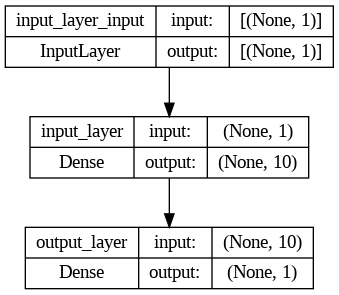

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualizing our model's predictions
To visualize predictions , its a good idea to plot them against the ground truth labels (dependent variables)
Often you will see this in the form of y_test versus y_pred

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[ 81.673454],
       [ 87.00177 ],
       [ 92.33009 ],
       [ 97.658424],
       [102.98675 ],
       [108.31507 ],
       [113.643394],
       [118.97171 ],
       [124.30004 ],
       [129.62836 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

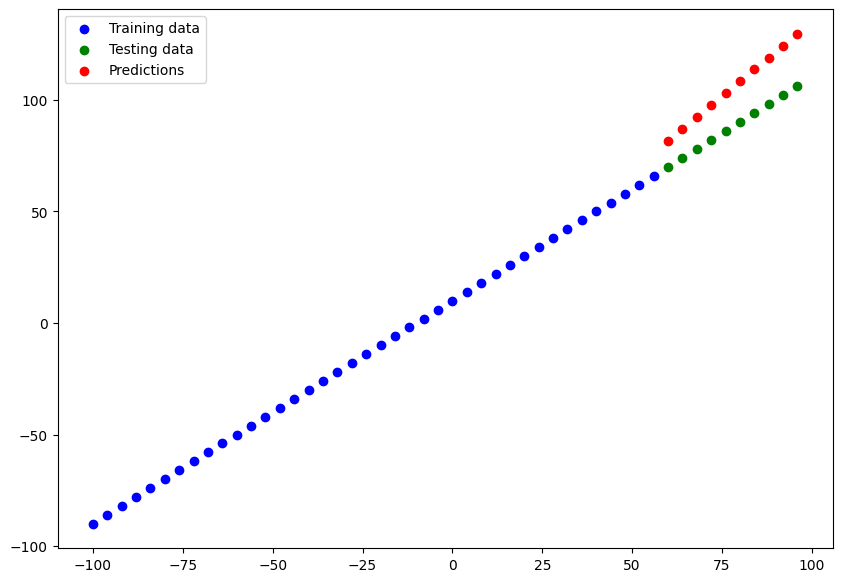

In [ ]:
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on , there will be different evaluation metrics to evaluate your model's performance
Since we are working on a regression , two of the main metrics
* 1)MAE - mean absolute error - on average, how wrong is each of my model's predictions
* 2)MSE - mean square error - square the average errors

In [ ]:
model.evaluate(X_test , y_test)

1/1 [==============================] - 0s 120ms/step - loss: 17.6509 - mae: 17.6509


[17.65090560913086, 17.65090560913086]

In [ ]:
y_pred

array([[ 81.673454],
       [ 87.00177 ],
       [ 92.33009 ],
       [ 97.658424],
       [102.98675 ],
       [108.31507 ],
       [113.643394],
       [118.97171 ],
       [124.30004 ],
       [129.62836 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate the mean absolute error
tf.keras.metrics.mean_absolute_error(
    y_test, y_pred
)  #burda en başta saçma şeyler bulduk çünkü bizim y_predimizle y_testimiz aynı shape de değil. Bu yüzden squeeze metodu ile y_preddeki fazlalık shape i silicez. mean absolute errorda iki parametre de aynı shape te olmak zorunda

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.930618, 10.      , 10.466019, 12.26337 , 15.589398, 20.315071,
       25.643396, 30.97171 , 36.30004 , 41.628357], dtype=float32)>

In [ ]:
tf.constant(y_pred)  #gördüğümüz gibi (10,1) var bu 1 i silicez.

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 81.673454],
       [ 87.00177 ],
       [ 92.33009 ],
       [ 97.658424],
       [102.98675 ],
       [108.31507 ],
       [113.643394],
       [118.97171 ],
       [124.30004 ],
       [129.62836 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 81.673454,  87.00177 ,  92.33009 ,  97.658424, 102.98675 ,
       108.31507 , 113.643394, 118.97171 , 124.30004 , 129.62836 ],
      dtype=float32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(
    y_true = y_test, y_pred = tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=17.650906>

In [ ]:
#Calculate the mean squared error
mse = tf.keras.metrics.mean_squared_error( y_true = y_test ,
                                          y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=326.11115>

# Running experiments to improve our model
Build a model => fit it => evaluate it => tweak a model(yani epochs falan değiştirme improve etme) => fit it => evaluate it ....
* 1) Get more data - Get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
* 2) Make your model larger (using a more complex model) -  this might come in the form of more layers or more hidden units in each layer
* 3) Train for longer - give your model more of a chance to find patterns in the data
--------------------------------------------------------------------------------------------------
* Lets do 3 modelling experiments:
* 1)model1 - same as the original model, 1 layer , trained for 100 epochs
* 2)model2 - 2 layers , trained for 100 epochs
* 3)model3 - 2 layers , trained for 500 epochs

In [ ]:
#model1
#set random seed
tf.random.set_seed(42)

#Create a model

model_11 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

#Compiling a model

model_11.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit a model
model_11.fit( tf.expand_dims(X_train , axis = -1 ), y_train , epochs = 100 )

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 20.2434 - mae: 20.2434
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8410 - mae: 7.8410
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 16.2197 - mae: 16.2197
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6333 - mae: 8.6333
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 10.8738 - mae: 10.8738
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0516 - mae: 10.0516
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0898 - mae: 9.0898
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0903 - mae: 9.0903
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 15.0227 - mae: 15.0227
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5872 - mae: 7.5872
Epoch 11/100
2/2 [==============================] - 0s 9ms/ste

1/1 [==============================] - 0s 49ms/step


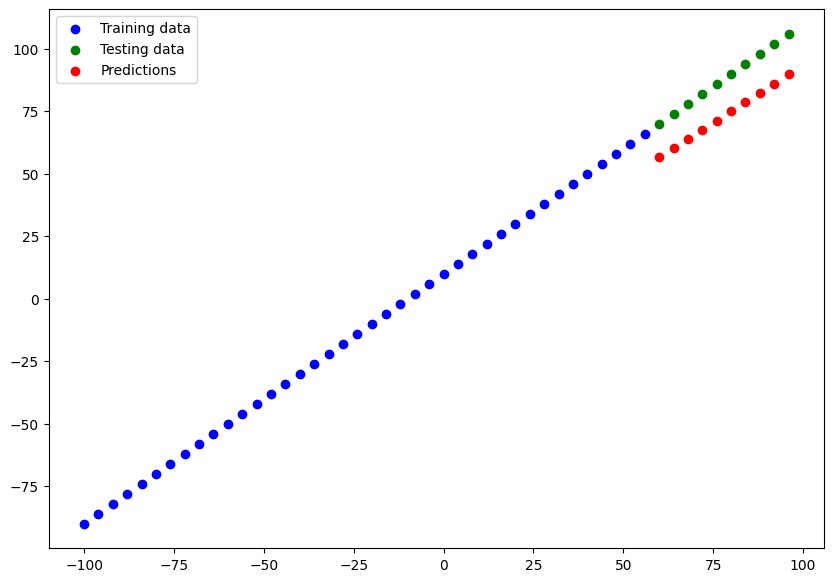

In [ ]:
y_preds_1 = model_11.predict(X_test)
plot_predictions( predictions = y_preds_1)

In [ ]:
mae_1 = tf.keras.metrics.mean_absolute_error(
    y_true = y_test, y_pred = tf.squeeze(y_preds_1)
)
mse_1 = tf.keras.metrics.mean_squared_error( y_true = y_test ,
                                          y_pred = tf.squeeze(y_preds_1))

mae_1 , mse_1


(<tf.Tensor: shape=(), dtype=float32, numpy=14.851092>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.37436>)

In [ ]:
#For model 2
#Create a model
tf.random.set_seed(42)

model_12 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10) ,
     tf.keras.layers.Dense(1)
     ]
)

#Compile a model

model_12.compile( loss = tf.keras.losses.mae ,
                 optimizer = tf.keras.optimizers.SGD() ,
                 metrics = ["mae"]
                  )

#Fit the model
model_12.fit( tf.expand_dims(X_train , axis = -1 ), y_train , epochs = 100 )




Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 14.2972 - mae: 14.2972
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.0831 - mae: 24.0831
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4043 - mae: 19.4043
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1300 - mae: 14.1300
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.7013 - mae: 19.7013
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0711 - mae: 9.0711
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0197 - mae: 15.0197
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 16.1194 - mae: 16.1194
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 27.9580 - mae: 27.9580
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 15.1413 - mae: 15.1413
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 44ms/step


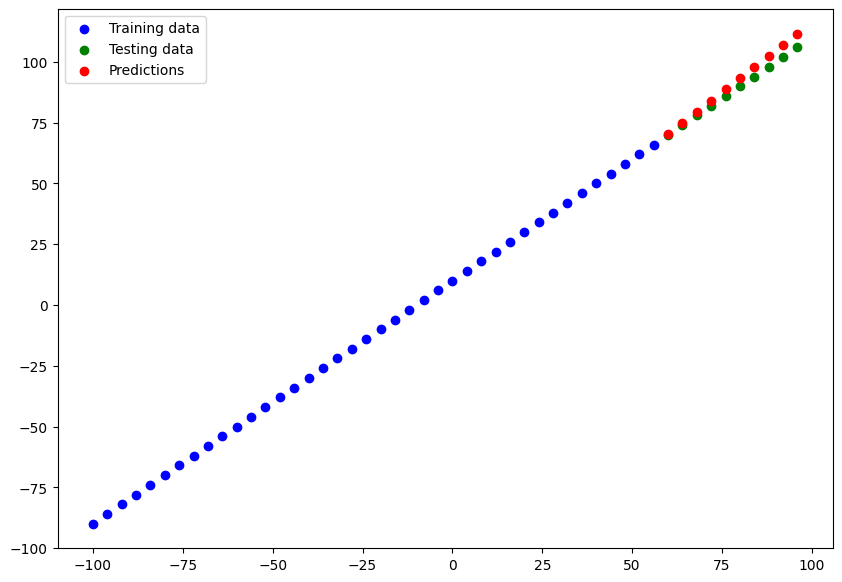

In [ ]:
y_preds_2 = model_12.predict(X_test)
plot_predictions( predictions = y_preds_2)

In [ ]:


mae_2 = tf.keras.metrics.mean_absolute_error(
    y_true = y_test, y_pred = tf.squeeze(y_preds_2)
)
mse_2 = tf.keras.metrics.mean_squared_error( y_true = y_test ,
                                          y_pred = tf.squeeze(y_preds_2))  #evaluation metrics

mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9929833>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.710004>)

In [ ]:
#For model 3
#Create a model
tf.random.set_seed(42)

model_13 = tf.keras.Sequential(

                               [tf.keras.layers.Dense(10) ,
                                tf.keras.layers.Dense(1)  #output layer
                                ]
)

#Compile a model

model_13.compile(loss = tf.keras.losses.mae ,
                 optimizer = tf.keras.optimizers.SGD() ,
                 metrics = ["mae"]

                 )

#Fit a model
model_13.fit( tf.expand_dims(X_train , axis = -1 ), y_train , epochs = 500 )


2/2 [==============================] - 0s 8ms/step - loss: 10.5233 - mae: 10.5233
Epoch 42/500
2/2 [==============================] - 0s 9ms/step - loss: 7.8519 - mae: 7.8519
Epoch 43/500
2/2 [==============================] - 0s 7ms/step - loss: 14.2425 - mae: 14.2425
Epoch 44/500
2/2 [==============================] - 0s 10ms/step - loss: 25.0361 - mae: 25.0361
Epoch 45/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9809 - mae: 10.9809
Epoch 46/500
2/2 [==============================] - 0s 7ms/step - loss: 13.0984 - mae: 13.0984
Epoch 47/500
2/2 [==============================] - 0s 7ms/step - loss: 10.4236 - mae: 10.4236
Epoch 48/500
2/2 [==============================] - 0s 6ms/step - loss: 17.1253 - mae: 17.1253
Epoch 49/500
2/2 [==============================] - 0s 7ms/step - loss: 9.6518 - mae: 9.6518
Epoch 50/500
2/2 [==============================] - 0s 7ms/step - loss: 13.9550 - mae: 13.9550
Epoch 51/500
2/2 [==============================] - 0s 7ms/step - 

In [ ]:
qy_preds_3 = tf.squeeze(y_preds_3)

1/1 [==============================] - 0s 39ms/step


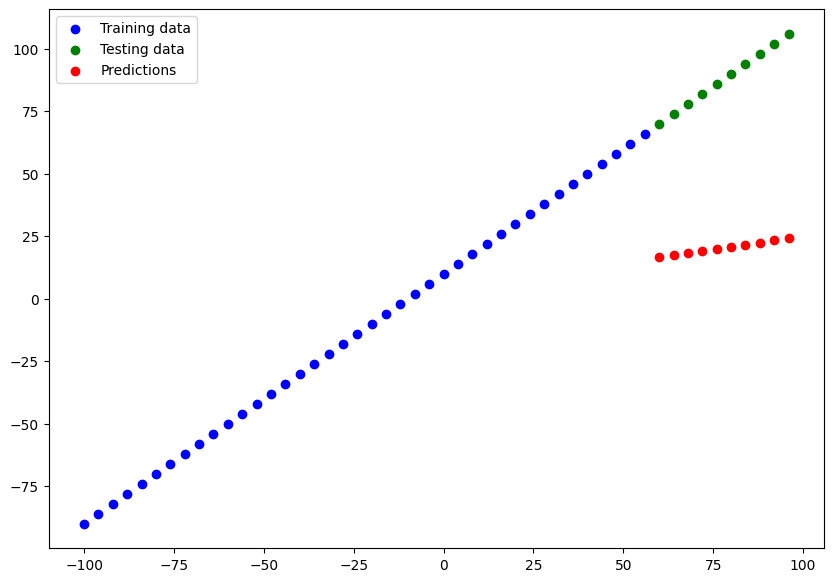

In [ ]:
qy_preds_3 = model_13.predict(X_test)
plot_predictions( predictions = qy_preds_3)

In [ ]:
mae_3 = tf.keras.metrics.mean_absolute_error(
    y_true = y_test, y_pred = tf.squeeze(qy_preds_3)
)
mse_3 = tf.keras.metrics.mean_squared_error( y_true = y_test ,
                                          y_pred = tf.squeeze(qy_preds_3))  #evaluation metrics

mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.53123>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4644.301>)

# Comparing the results of our experiment
* We have run a few experiments , lets compare the results

In [ ]:
#Lets compare our model's results using pandas dataframe
import pandas as pd

model_results = [["model_11" , mae_1.numpy() , mse_1.numpy()] ,
                           ["model_12" , mae_2.numpy() , mse_2.numpy()] ,
                           ["model_13" , mae_3.numpy() , mse_3.numpy()]]

all_results = pd.DataFrame(model_results , columns =  ["model" , "mae" , "mse"])
all_results

,model,mae,mse
0,model_11,14.851092,221.374359
1,model_12,2.992983,11.710004
2,model_13,67.531227,4644.300781


# model_12 is the best

In [ ]:
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# One of your main goals should be to minimize the time between your experiments. The more experiment you do , the more things you will figure out which dont work and in turn , get closer to figuring out what does work

# Tracking your experiments.

One really good habit in machine learning modelling it to track the results of your experiments.

And when doing so , it can be tedious if you are running lots of experiments.

Luckily , there are tools to help us.

# TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving our models
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

There are two main formats to saving our models
* 1) The SavedModel format
* 2) The HDF5 format

In [ ]:
# Saving model with SavedModel format
model_12.save("model_12_saved")

In [ ]:
# Saving model with HDF5 format
model_12.save("model_12_saved.h5")

In [ ]:
#Load in the SaveModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/model_12_saved")
loaded_SavedModel_format.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_12 predictions with SavedModel format model predictions
model_12_preds = model_12.predict(X_test)
loaded_SavedModel_format_predicts = loaded_SavedModel_format.predict(X_test)

model_12_preds == loaded_SavedModel_format_predicts


1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading with the h5 format

loaded_h5_format = tf.keras.models.load_model("/content/model_12_saved.h5")

In [ ]:
# Compare model_12 predictions with h5 format model predictions
model_12_preds = model_12.predict(X_test)
loaded_h5_format_predicts = loaded_h5_format.predict(X_test)

model_12_preds == loaded_h5_format_predicts

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])